# Design a convolutional neural network using following layers and Train that on the MNIST dataset:


1. Conv2d: number of kernels: 8, size of kernel and strides: desired
2. MaxPooling2d: the size of the kernel: 2x2, strides: desired
3. Conv2d: number of kernels: 16, size of kernel and strides: desired
4. MaxPooling2d: the size of the kernel: 2x2, strides: desired
5. Dropout: 0.2
6. Conv2d: number of kernels: 32, size of kernel and strides: desired
7. MaxPooling2d: the size of the kernel: 2x2, strides: desired
8. Flatten
9. Dense: number of units: 100
10. Dense: number of units = number of classes, activation: softmax

** Other Hyperparameters: Desired <br/>
** Not mentioned activations: Relu <br/>
** type of all Paddings: 'same'

In [1]:
#1. Import Libraries

In [2]:
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import tensorflow.keras.models as models

In [3]:
#2. Load the Data

In [4]:
(X_train, y_train), (X_test, y_test) = load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
#3. Show X_train[101]

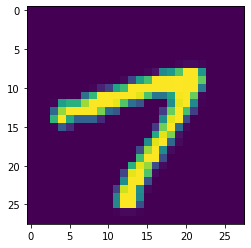

In [7]:
plt.imshow(X_train[101])

In [8]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [11]:
X_test.shape

(10000, 28, 28, 1)

In [12]:
#4. Normalize the images

In [13]:
X_train = X_train / 255.0
X_test = X_test /255.0

In [14]:
inp_shape = X_train.shape[1:]
inp_shape

(28, 28, 1)

In [15]:
#5. Model Architecture (according to the mentioned architecture above!)

In [16]:
model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=inp_shape),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 16)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          4

In [18]:
#6. Plot the model

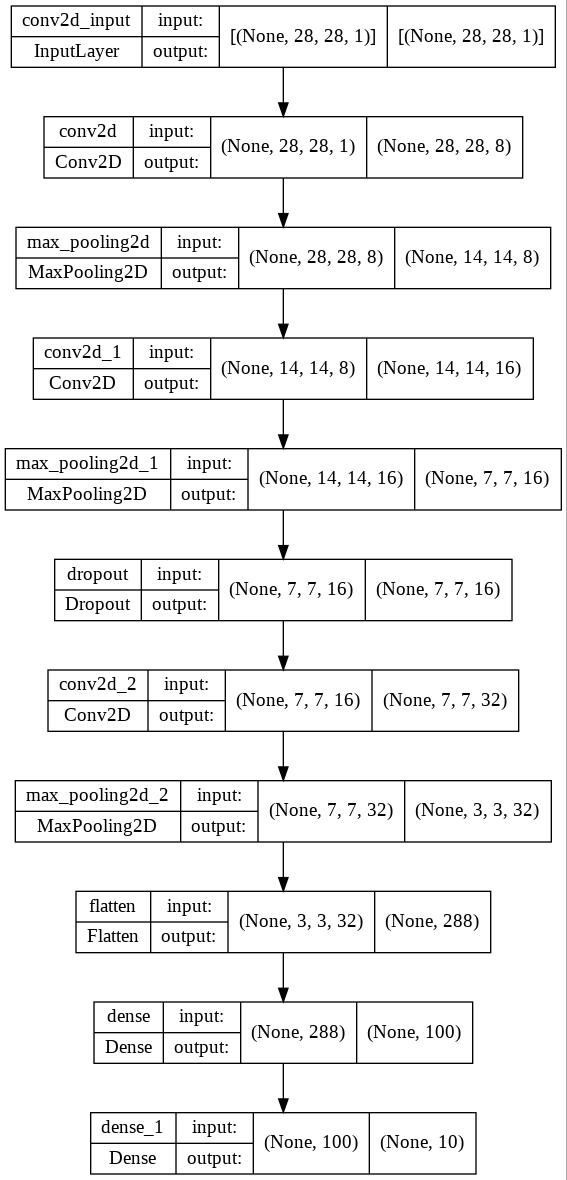

In [19]:
plot_model(model, 'model.jpg', show_shapes=True)

In [20]:
#7. Compile

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [22]:
#8. Fit

In [23]:
hst = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 5ms/step - loss: 0.4881 - accuracy: 0.8533 - val_loss: 0.1170 - val_accuracy: 0.9640
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1388 - accuracy: 0.9561 - val_loss: 0.0801 - val_accuracy: 0.9746
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1042 - accuracy: 0.9661 - val_loss: 0.0680 - val_accuracy: 0.9783
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0851 - accuracy: 0.9723 - val_loss: 0.0641 - val_accuracy: 0.9802
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0739 - accuracy: 0.9772 - val_loss: 0.0534 - val_accuracy: 0.9846
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0634 - accuracy: 0.9794 - val_loss: 0.0546 - val_accuracy: 0.9843
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0602 - accuracy: 0.9802 - val_loss: 0.0476 - val_accuracy: 0.9859
Epoch 

In [24]:
#9. Evaluate

In [25]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(loss, accuracy)

0.038921862840652466 0.9871000051498413


In [26]:
#10. Download an image from the net and predict that.

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
test_img = cv.imread("/content/drive/MyDrive/Colab Notebooks/6.jpg", cv.IMREAD_GRAYSCALE)

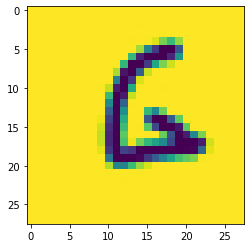

In [29]:
plt.figure()
plt.imshow(test_img)
plt.show()

In [30]:
test_img.shape

(28, 28)

In [31]:
img_test = test_img.reshape(1, 28, 28, 1)

In [32]:
test_img = test_img.reshape(1, 28, 28).astype('float32')/255.0

In [33]:
predict = model.predict(test_img)
predict

array([[3.90050444e-03, 9.57882265e-04, 8.13060403e-02, 1.04610614e-01,
        2.66205609e-01, 3.01562160e-01, 1.28752798e-01, 3.04577071e-02,
        8.21531489e-02, 9.35383869e-05]], dtype=float32)

In [34]:
np.argmax(predict)

5